In [103]:
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import style

In [2]:
file_1 = r'C:\Users\User\VSCode\CDSS\source\智抗菌平台統計(20211201-20220119)_OV.xlsx'
file_2 = r'C:\Users\User\VSCode\CDSS\source\智抗菌平台統計_20211228.xlsx'
file_3 = r'C:\Users\User\VSCode\CDSS\source\智抗菌平台報表_20220210.xlsx'
file_4 = r'C:\Users\User\VSCode\CDSS\source\智抗菌平台報表_20220309.xlsx'
file_5 = r'C:\Users\User\VSCode\CDSS\source\智抗菌平台報表_20220331.xlsx'
file_6 = r'C:\Users\User\VSCode\CDSS\source\智抗菌平台報表_20220502.xlsx'


sepsis_1 = pd.read_excel(file_1, sheet_name='Sepsis', dtype={'病歷號碼':'str'})
sepsis_2 = pd.read_excel(file_2, sheet_name='Sepsis', dtype={'病歷號碼':'str'})
sepsis_3 = pd.read_excel(file_3, sheet_name='Sepsis', dtype={'病歷號碼':'str'})
sepsis_4 = pd.read_excel(file_4, sheet_name='Sepsis', dtype={'病歷號碼':'str'})
sepsis_5 = pd.read_excel(file_5, sheet_name='Sepsis', dtype={'病歷號碼':'str'})
sepsis_6 = pd.read_excel(file_6, sheet_name='Sepsis', dtype={'病歷號碼':'str'})

In [7]:
Sepsis = pd.concat([sepsis_1, sepsis_2, sepsis_3, sepsis_4, sepsis_5, sepsis_6],axis=0).drop_duplicates().sort_values(['病歷號碼', 'time']).reset_index(drop=True)

In [18]:
Sepsis_nonnull = Sepsis[Sepsis.預測值 != '資料不足'][['病歷號碼', 'time', '預測值']].drop_duplicates().reset_index(drop=True)

In [19]:
Sepsis_nonnull[['預測值', '%']] = Sepsis_nonnull['預測值'].str.split('%', 1, expand=True)


In [31]:
Sepsis_nonnull = Sepsis_nonnull.drop(columns=['%'])
Sepsis_nonnull = Sepsis_nonnull[(Sepsis_nonnull['預測值'] != '-1') & (Sepsis_nonnull['預測值'] != '---')]

In [33]:
Sepsis_nonnull['預測值'] = Sepsis_nonnull['預測值'].astype('float')

In [37]:
Sepsis_nonnull.time = pd.to_datetime(Sepsis_nonnull.time)

In [39]:
# Sepsis_nonnull.to_excel(r'C:\Users\User\VSCode\CDSS\output\CDSS_Sepsis.xlsx', index=False)

2022/05/10

In [3]:
sepsis_f = r'C:\Users\User\VSCode\CDSS\output\CDSS_Sepsis.xlsx'
Sepsis = pd.read_excel(sepsis_f, dtype={'病歷號碼':'str'})

all_f = r'C:\Users\User\VSCode\CDSS\source\呱呱包.xlsx'
All = pd.read_excel(all_f, dtype={'病歷號碼':'str'})

In [10]:
Sepsis.columns

Index(['病歷號碼', 'time', '預測值'], dtype='object')

In [5]:
All.columns

Index(['表單號', '住院號', '申請編號', '病歷號碼', '生日(年月日)', '主診斷1', '診斷2', '診斷3', '診斷4',
       '診斷5', '開單醫師', '開單科別', '病房', '住院日', '出院日', '申請日', '採檢日', '簽收日', '報告日',
       '項目代碼', '項目名稱', '來源', '檢體', '菌名', 'strain', 'bed', '檢驗部收到時間', '發報告時間',
       '參考值', 'Lab_檢驗日期', 'Lab_報告日期', 'Lab_檢驗項目', 'Lab_檢驗值', 'Lab_表單號',
       'Lab_申請號', '床號', '性別', '体重', '出院診斷_1', '出院診斷_2', '出院診斷_3', '出院診斷_4',
       '出院診斷_5', '出院診斷_6', '出院診斷_7', '死亡日期', '時間', 'ICU', 'Death', '住院天數'],
      dtype='object')

In [48]:
death = All[['病歷號碼', 'ICU', 'Death']].drop_duplicates()

In [49]:
death_spesis = pd.merge(death, Sepsis, how = "inner", on=['病歷號碼']).drop_duplicates()

In [50]:
death_spesis_0 = death_spesis[death_spesis.Death==0].drop_duplicates()
death_spesis_1 = death_spesis[~(death_spesis.Death==0)].drop_duplicates()

In [57]:
death_spesis_1['max_death_date'] = death_spesis_1.groupby('病歷號碼')['time'].transform('max')
death_spesis_1 = death_spesis_1[death_spesis_1.max_death_date == death_spesis_1.time]
death_spesis_1 = death_spesis_1[['病歷號碼', 'ICU', 'Death', 'time', '預測值']]

In [59]:
DS = pd.concat([death_spesis_0, death_spesis_1], ignore_index=True).drop_duplicates()

In [60]:
DS['M'] = DS['time'].dt.month
DS['Y'] = DS['time'].dt.year
DS['date'] = pd.to_datetime(DS['Y'].astype('str') + '-' + DS['M'].astype('str'))

In [61]:
DS.columns

Index(['病歷號碼', 'ICU', 'Death', 'time', '預測值', 'M', 'Y', 'date'], dtype='object')

In [112]:
DS = DS[['病歷號碼', 'date', 'ICU', 'Death', '預測值']].drop_duplicates().reset_index(drop=True)
DS.rename(columns={'Death':'Status', 'date':'Date'}, inplace = True)
DS['Status'] = np.where(DS['Status']==1, 'Death', 'Living')

In [63]:
DS.病歷號碼.drop_duplicates().count()

1850

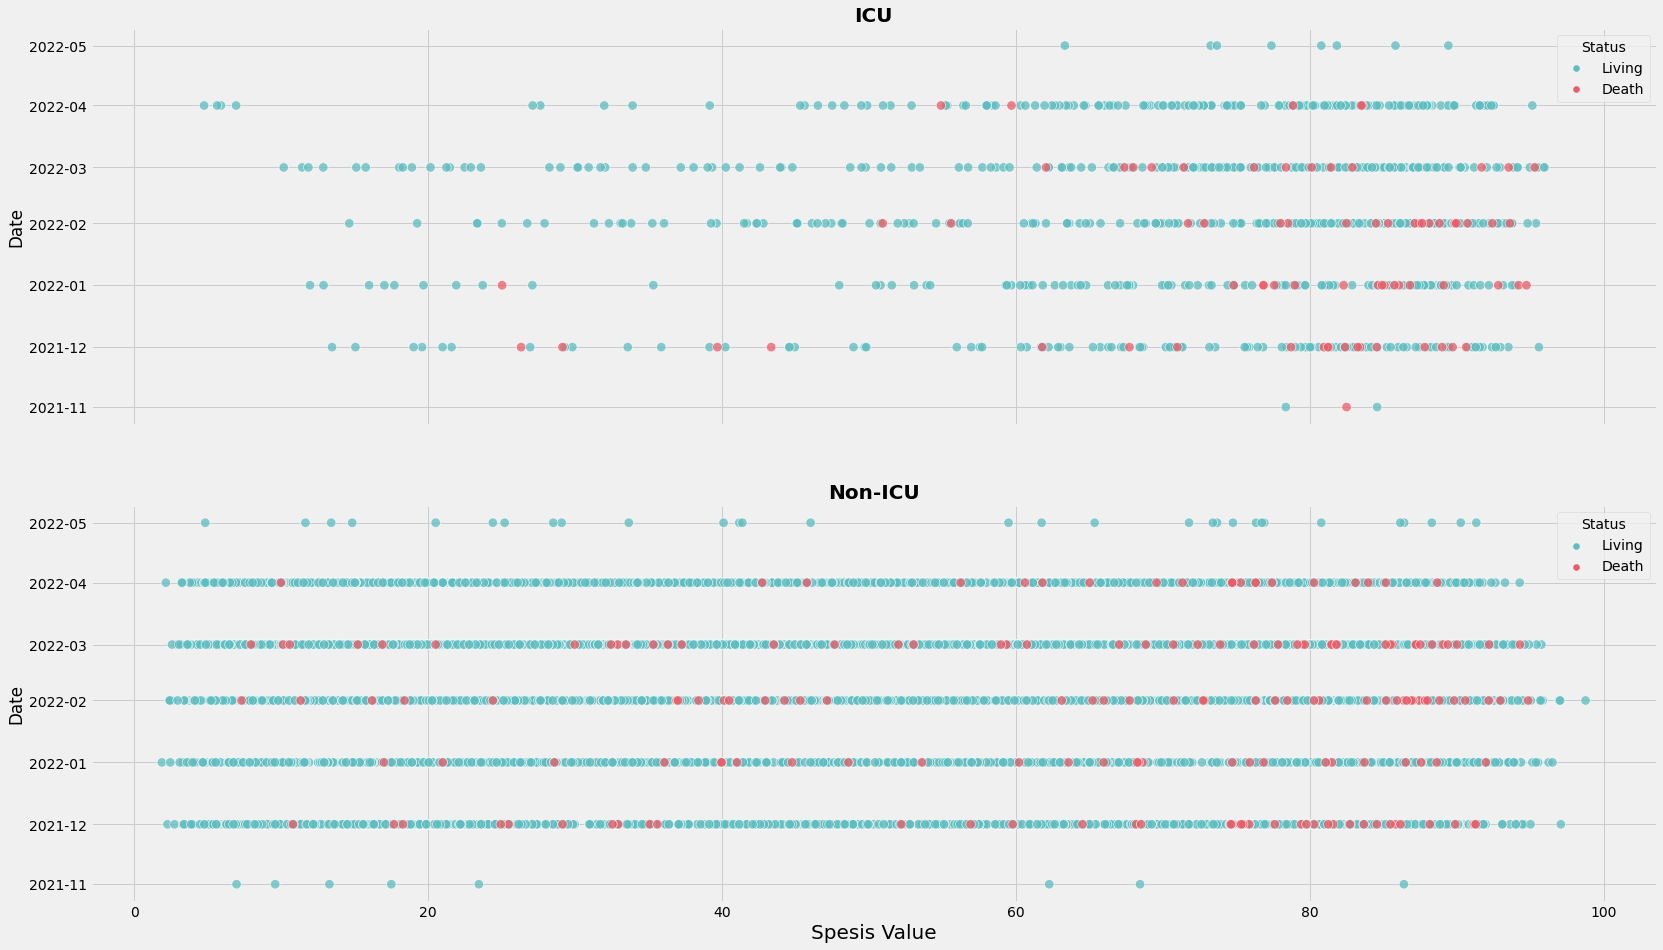

In [139]:
matplotlib.rcParams['font.family'] = "roboto"
matplotlib.style.use('fivethirtyeight')
fig, axes = plt.subplots(2, 1, figsize=(25,15), sharex=True)
color_dict = dict({'Living':'#5FBCBF',
                   'Death':'#EB5C68'
                   })

# axes[0].set_title('ICU')
# axes[1].set_title('Non-ICU')
plt.xlabel('Spesis Value', fontsize = 20)

g1 = sns.scatterplot(data=DS[DS.ICU==1], y='Date', x='預測值', s = 90, 
                hue='Status', alpha=0.75, palette=color_dict, ax=axes[0]).set_title(
                'ICU', fontdict = { 'fontsize': 20, 'fontweight':'bold'})

                
g2 = sns.scatterplot(data=DS[DS.ICU==0], y='Date', x='預測值', s = 90,
                hue='Status', alpha=0.75, palette=color_dict, ax=axes[1]).set_title(
                'Non-ICU', fontdict = { 'fontsize': 20, 'fontweight':'bold'})


In [147]:
conditions=[(DS.預測值>=0)&(DS.預測值<=10), (DS.預測值>10)&(DS.預測值<=20),
            (DS.預測值>20)&(DS.預測值<=30), (DS.預測值>30)&(DS.預測值<=40),
            (DS.預測值>40)&(DS.預測值<=50), (DS.預測值>50)&(DS.預測值<=60),
            (DS.預測值>60)&(DS.預測值<=70), (DS.預測值>70)&(DS.預測值<=80),
            (DS.預測值>80)&(DS.預測值<=90), (DS.預測值>90)&(DS.預測值<=100)]
values=['0~10%', '11~20%', '21~30%', '31~40%', '41~50%', '51~60%', '61~70%',
        '71~80%', '81~90%', '91~100%']

DS['Pred_value'] = np.select(conditions, values)

In [152]:
pd.DataFrame(DS.groupby('Pred_value')['Status'].value_counts()).to_excel(r'C:\Users\User\VSCode\CDSS\output\Spesis_Death.xlsx')

In [145]:
d = All[['病歷號碼', 'ICU', 'Death', 'Lab_報告日期', 'Lab_檢驗項目', 'Lab_檢驗值', '住院天數']].drop_duplicates()

d = d[d['Lab_檢驗項目']=='HCRP']
d_1 = d[d.Death==1]
d_0 = d[~(d.Death==1)]
d_1['Max_Lab_Date'] = d_1.groupby('病歷號碼')['Lab_報告日期'].transform('max')
d_1 = d_1[d_1.Max_Lab_Date==d_1.Lab_報告日期]

In [143]:
d  = d[d['住院天數'].notna()==True]